<a href="https://colab.research.google.com/github/renatagomezc/Regresion-Lineal/blob/main/Girona_Actividad_6_1_(Regresi%C3%B3n_Lineal_Simple).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Actividad 6.1 (Regresión Lineal Simple) Girona**

In [6]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df= pd.read_csv('Girona_limpio.csv', index_col=0)
df.head()

<ipython-input-7-3caab853d251>:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv('Girona_limpio.csv', index_col=0)


,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
0,14551.0,20230300000000.0,57237,1.0,5.0,0.0,41.9965,2.83646,2.0,0.0,...,Private room,1 private bath,"[""Shared pool"", ""Refrigerator"", ""Long term sta...",$42.00,t,31/03/2023,08/10/2010,27/02/2023,HUTG-049542,f
1,1205757.0,20230300000000.0,6586355,1.0,1.0,0.0,41.79304,2.77412,2.0,0.0,...,Private room,1.5 shared baths,"[""Free parking on premises"", ""Refrigerator"", ""...",$47.00,t,31/03/2023,01/08/2013,26/06/2022,--,f
2,1212820.0,20230300000000.0,6620645,2.0,3.0,0.0,42.11284,3.1667,4.0,0.0,...,Entire home/apt,1 bath,"[""Air conditioning"", ""Free parking on premises...",$74.00,t,01/04/2023,10/06/2013,30/12/2022,--,f
3,751638.0,20230300000000.0,3680160,6.0,6.0,0.0,42.36958,2.9803,2.0,0.0,...,Private room,1 private bath,"[""Hair dryer"", ""Luggage dropoff allowed"", ""Fre...",$45.00,t,31/03/2023,23/08/2013,29/08/2022,PG000794,t
4,41342.0,20230300000000.0,180072,2.0,3.0,0.0,42.34655,3.20463,4.0,0.0,...,Entire home/apt,1 bath,"[""Free parking on premises"", ""Refrigerator"", ""...",$120.00,t,01/04/2023,14/07/2013,28/08/2021,HUTG-003688,f


**Valores Nulos**

In [8]:
valores_nulos=df.isnull().sum()
valores_nulos

id                           0
scrape_id                    0
host_id                      0
host_listings_count          0
host_total_listings_count    0
                            ..
calendar_last_scraped        2
first_review                 2
last_review                  2
license                      2
instant_bookable             2
Length: 75, dtype: int64

In [9]:
Y = df.select_dtypes(include=[np.float, np.int])
x = df.select_dtypes(include=[np.object])

<ipython-input-9-8b94f98b8969>:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y = df.select_dtypes(include=[np.float, np.int])
<ipython-input-9-8b94f98b8969>:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y = df.select

In [10]:
Y = Y.fillna(0)
x=x.fillna('--')

In [11]:
df=pd.merge(Y,x, left_index=True, right_index=True)

In [12]:
valores_nulos=df.isnull().sum()
valores_nulos

availability_90           0
availability_365          0
number_of_reviews         0
number_of_reviews_ltm     0
number_of_reviews_l30d    0
                         ..
calendar_last_scraped     0
first_review              0
last_review               0
license                   0
instant_bookable          0
Length: 75, dtype: int64

**Outliers**

Ya estoy trabajando con un dataframe limpio por lo que los valores nulos y outliers ya fueron tratados

##**Entire home/apt**

In [13]:
entire=df[df['room_type']=='Entire home/apt']

###**host_acceptance_rate vs host_response_rate**

In [14]:
entire.host_acceptance_rate= entire.host_acceptance_rate.replace({'\%':''}, regex = True)
entire.host_acceptance_rate= entire.host_acceptance_rate.replace({'\,':''}, regex = True)
entire.host_acceptance_rate= entire.host_acceptance_rate.replace({'--':'0'}, regex = True)
entire['host_acceptance_rate'] = entire['host_acceptance_rate'].astype(float)

entire.host_response_rate= entire.host_response_rate.replace({'\%':''}, regex = True)
entire.host_response_rate= entire.host_response_rate.replace({'\,':''}, regex = True)
entire.host_response_rate= entire.host_response_rate.replace({'--':'0'}, regex = True)
entire['host_response_rate'] = entire['host_response_rate'].astype(float)

<ipython-input-14-bf8a7a08eacd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  entire.host_acceptance_rate= entire.host_acceptance_rate.replace({'\%':''}, regex = True)
<ipython-input-14-bf8a7a08eacd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  entire.host_acceptance_rate= entire.host_acceptance_rate.replace({'\,':''}, regex = True)
<ipython-input-14-bf8a7a08eacd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

In [15]:
x= entire[['host_response_rate']]
y= entire[['host_acceptance_rate']]
data=entire

In [16]:
#Encontramos la correlación entre las variables  
Corr_Factors=entire[[x.columns[0], y.columns[0]]].corr()
Corr_Factors

,host_response_rate,host_acceptance_rate
host_response_rate,1.000000,0.544535
host_acceptance_rate,0.544535,1.000000


In [17]:
#Encontramos el valor absoluto de todas las correlaciones entre las variables 
Corr_Factors1= abs(Corr_Factors)
Corr_Factors1

,host_response_rate,host_acceptance_rate
host_response_rate,1.000000,0.544535
host_acceptance_rate,0.544535,1.000000


<Axes: >

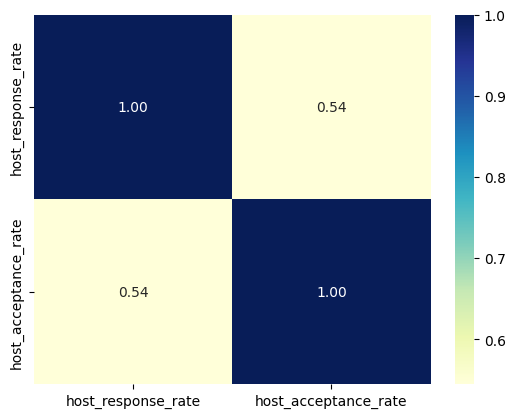

In [18]:
#Graficamos el mapa de los coeficientes de correlación 
Heat_Map= sns.heatmap(Corr_Factors1, cmap = 'YlGnBu', annot=True, fmt=".2f")  
Heat_Map

<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

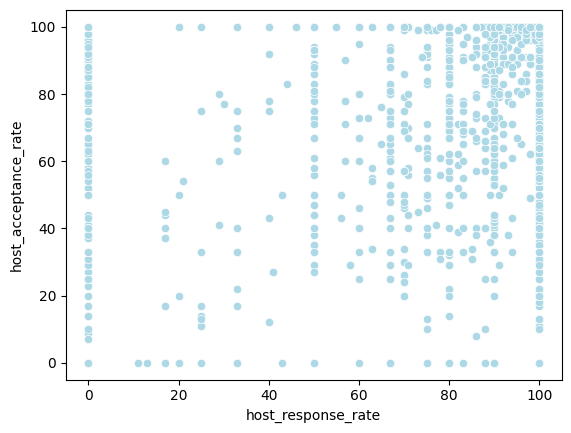

In [19]:
from turtle import color
sns.scatterplot(x=x.columns[0], y=y.columns[0], color="lightblue", data=data)

In [20]:
Vars_Indep= x
Var_Dep= y

In [21]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()
type(model)

sklearn.linear_model._base.LinearRegression

In [22]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [23]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [24]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_response_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[0.49271582]]),
 'rank_': 1,
 'singular_': array([4240.95230767]),
 'intercept_': array([42.59571548])}

####**Modelo matemático**
 Modelo matemático:y= 0.62852689x + 32.77244893**

---




In [25]:
y_pred= model.predict(X=x)
y_pred

array([[91.86729733],
       [42.59571548],
       [91.86729733],
       ...,
       [63.78249568],
       [88.4182866 ],
       [63.78249568]])

In [26]:
#Insertamos la columna de predicciones en el DataFrame
data.insert(0, 'Predicciones', y_pred)
data[[x.columns[0],'Predicciones']]


,host_response_rate,Predicciones
2,100.0,91.867297
4,0.0,42.595715
5,100.0,91.867297
6,100.0,91.867297
7,0.0,42.595715
...,...,...
19650,93.0,88.418287
19651,100.0,91.867297
19652,43.0,63.782496
19653,93.0,88.418287


<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

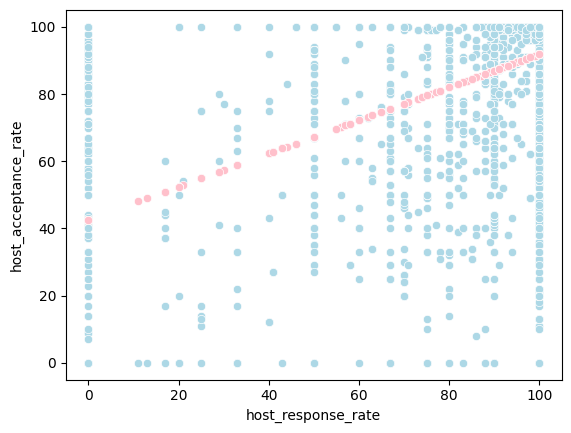

In [27]:
sns.scatterplot(x=x.columns[0], y=y.columns[0], color="lightblue", data=data)
sns.scatterplot(x=x.columns[0], y='Predicciones', color="pink", data=data)

In [28]:
varx_e=[]
vary_e=[]
deter_e=[]
corr_e=[]

In [29]:
varx_e.append(x.columns[0])
vary_e.append(y.columns[0])

In [30]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
deter_e.append(coef_Deter)
coef_Deter

0.29651842036516995

In [31]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
corr_e.append(coef_Correl)
coef_Correl

0.5445350497122935

###**host_acceptance_rate vs price**

In [32]:
entire.host_acceptance_rate= entire.host_acceptance_rate.replace({'\%':''}, regex = True)
entire.host_acceptance_rate= entire.host_acceptance_rate.replace({'\,':''}, regex = True)
entire.host_acceptance_rate= entire.host_acceptance_rate.replace({'--':'0'}, regex = True)
entire['host_acceptance_rate'] = entire['host_acceptance_rate'].astype(float)

entire.price= entire.price.replace({'\$':''}, regex = True)
entire.price= entire.price.replace({'\,':''}, regex = True)
entire.price= entire.price.replace({'--':'0'}, regex = True)

entire['price'] = entire['price'].astype(float)

<ipython-input-32-af93ca077cdc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  entire.host_acceptance_rate= entire.host_acceptance_rate.replace({'\%':''}, regex = True)
<ipython-input-32-af93ca077cdc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  entire.host_acceptance_rate= entire.host_acceptance_rate.replace({'\,':''}, regex = True)
<ipython-input-32-af93ca077cdc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

In [33]:
x= entire[['price']]
y= entire[['host_acceptance_rate']]
data=entire

In [34]:
#Encontramos la correlación entre las variables  
Corr_Factors=entire[[x.columns[0], y.columns[0]]].corr()
Corr_Factors

,price,host_acceptance_rate
price,1.000000,-0.030962
host_acceptance_rate,-0.030962,1.000000


In [35]:
#Encontramos el valor absoluto de todas las correlaciones entre las variables 
Corr_Factors1= abs(Corr_Factors)
Corr_Factors1

,price,host_acceptance_rate
price,1.000000,0.030962
host_acceptance_rate,0.030962,1.000000


<Axes: >

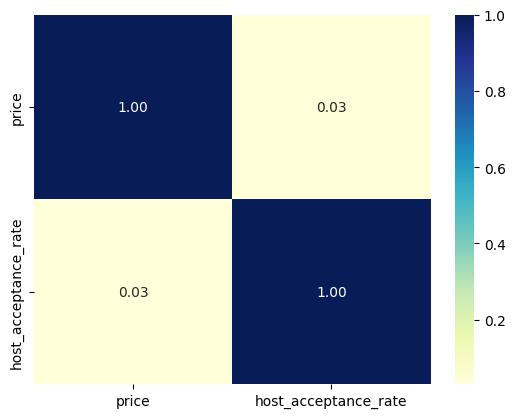

In [36]:
#Graficamos el mapa de los coeficientes de correlación 
Heat_Map= sns.heatmap(Corr_Factors1, cmap = 'YlGnBu', annot=True, fmt=".2f")  
Heat_Map

<Axes: xlabel='price', ylabel='host_acceptance_rate'>

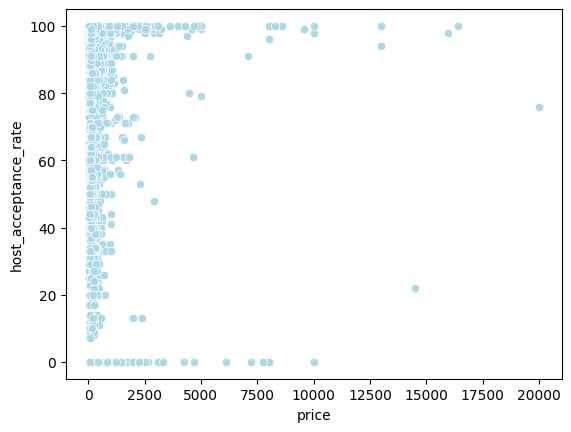

In [37]:
from turtle import color
sns.scatterplot(x=x.columns[0], y=y.columns[0], color="lightblue", data=data)

In [38]:
Vars_Indep= x
Var_Dep= y

In [39]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()
type(model)

sklearn.linear_model._base.LinearRegression

In [40]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [41]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [42]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['price'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[-0.00161595]]),
 'rank_': 1,
 'singular_': array([73524.95597413]),
 'intercept_': array([85.08830297])}

####**Modelo matemático**
 Modelo matemático:y= -4.66947697e-05x + 87.43659536

---




In [43]:
y_pred= model.predict(X=x)
y_pred

array([[84.96872293],
       [84.89438939],
       [84.91862859],
       ...,
       [84.9816505 ],
       [84.91378075],
       [84.97033888]])

In [44]:
#Insertamos la columna de predicciones en el DataFrame
data['Predicciones']= y_pred
data[[x.columns[0],'Predicciones']]


<ipython-input-44-e2c1e9328338>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Predicciones']= y_pred


,price,Predicciones
2,74.0,84.968723
4,120.0,84.894389
5,105.0,84.918629
6,110.0,84.910549
7,60.0,84.991346
...,...,...
19650,209.0,84.750570
19651,52.0,85.004274
19652,66.0,84.981651
19653,108.0,84.913781


<Axes: xlabel='price', ylabel='host_acceptance_rate'>

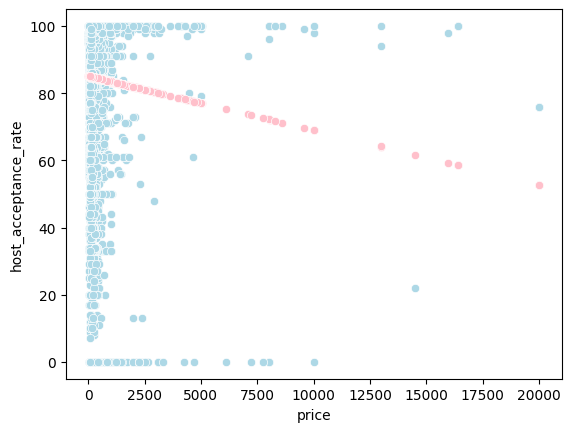

In [45]:
sns.scatterplot(x=x.columns[0], y=y.columns[0], color="lightblue", data=data)
sns.scatterplot(x=x.columns[0], y='Predicciones', color="pink", data=data)

In [46]:
varx_e.append(x.columns[0])
vary_e.append(y.columns[0])

In [47]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
deter_e.append(coef_Deter)
coef_Deter

0.0009586396372238681

In [48]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
corr_e.append(coef_Correl)
coef_Correl

0.03096190622723136

###**host_acceptance_rate vs number_of_reviews**

In [49]:
entire.host_acceptance_rate= entire.host_acceptance_rate.replace({'\%':''}, regex = True)
entire.host_acceptance_rate= entire.host_acceptance_rate.replace({'\,':''}, regex = True)
entire.host_acceptance_rate= entire.host_acceptance_rate.replace({'--':'0'}, regex = True)
entire['host_acceptance_rate'] = entire['host_acceptance_rate'].astype(float)

entire.number_of_reviews= entire.number_of_reviews.replace({'\$':''}, regex = True)
entire.number_of_reviews= entire.number_of_reviews.replace({'\,':''}, regex = True)
entire.number_of_reviews= entire.number_of_reviews.replace({'--':'0'}, regex = True)
entire['number_of_reviews'] = entire['number_of_reviews'].astype(float)

<ipython-input-49-acd4250babd5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  entire.host_acceptance_rate= entire.host_acceptance_rate.replace({'\%':''}, regex = True)
<ipython-input-49-acd4250babd5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  entire.host_acceptance_rate= entire.host_acceptance_rate.replace({'\,':''}, regex = True)
<ipython-input-49-acd4250babd5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

In [50]:
x= entire[['number_of_reviews']]
y= entire[['host_acceptance_rate']]
data=entire

In [51]:
#Encontramos la correlación entre las variables  
Corr_Factors=entire[[x.columns[0], y.columns[0]]].corr()
Corr_Factors

,number_of_reviews,host_acceptance_rate
number_of_reviews,1.000000,0.064665
host_acceptance_rate,0.064665,1.000000


In [52]:
#Encontramos el valor absoluto de todas las correlaciones entre las variables 
Corr_Factors1= abs(Corr_Factors)
Corr_Factors1

,number_of_reviews,host_acceptance_rate
number_of_reviews,1.000000,0.064665
host_acceptance_rate,0.064665,1.000000


<Axes: >

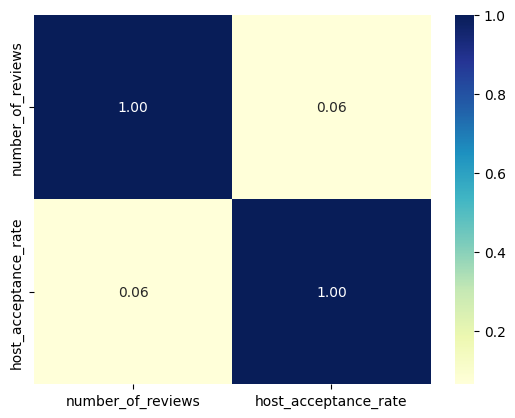

In [53]:
#Graficamos el mapa de los coeficientes de correlación 
Heat_Map= sns.heatmap(Corr_Factors1, cmap = 'YlGnBu', annot=True, fmt=".2f")  
Heat_Map

<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

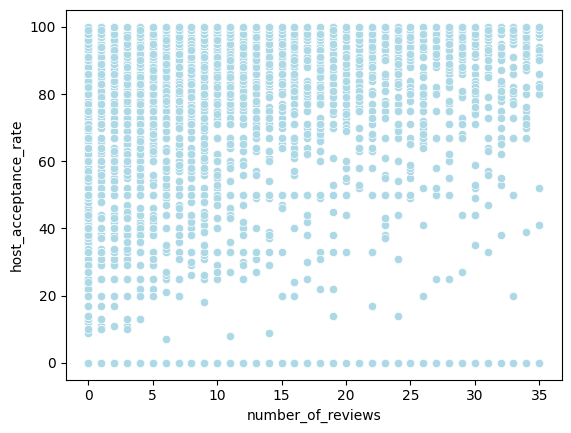

In [54]:
from turtle import color
sns.scatterplot(x=x.columns[0], y=y.columns[0], color="lightblue", data=data)

In [55]:
Vars_Indep= x
Var_Dep= y

In [56]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()
type(model)

sklearn.linear_model._base.LinearRegression

In [57]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [58]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [59]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[0.23512448]]),
 'rank_': 1,
 'singular_': array([1055.3764932]),
 'intercept_': array([83.4751281])}

####**Modelo matemático**
 Modelo matemático:y= 0.15211964x + 84.17320674

---




In [60]:
y_pred= model.predict(X=x)
y_pred

array([[83.4751281 ],
       [86.06149737],
       [90.293738  ],
       ...,
       [83.4751281 ],
       [83.4751281 ],
       [83.4751281 ]])

In [61]:
#Insertamos la columna de predicciones en el DataFrame
data['Predicciones']= y_pred
data[[x.columns[0],'Predicciones']]


<ipython-input-61-e2c1e9328338>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Predicciones']= y_pred


,number_of_reviews,Predicciones
2,0.0,83.475128
4,11.0,86.061497
5,29.0,90.293738
6,15.0,87.001995
7,10.0,85.826373
...,...,...
19650,0.0,83.475128
19651,0.0,83.475128
19652,0.0,83.475128
19653,0.0,83.475128


<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

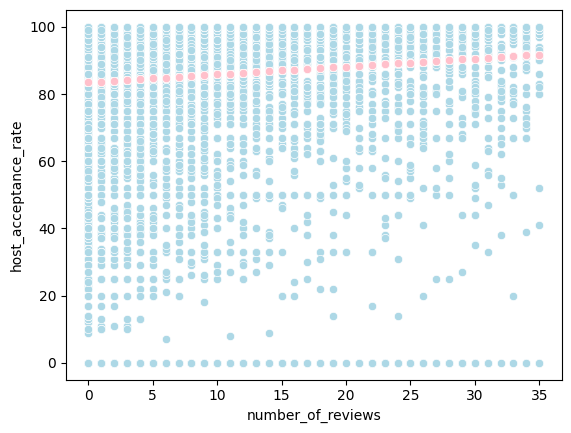

In [62]:
sns.scatterplot(x=x.columns[0], y=y.columns[0], color="lightblue", data=data)
sns.scatterplot(x=x.columns[0], y='Predicciones', color="pink", data=data)

In [63]:
varx_e.append(x.columns[0])
vary_e.append(y.columns[0])

In [64]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
deter_e.append(coef_Deter)
coef_Deter

0.004181599322673368

In [65]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
corr_e.append(coef_Correl)
coef_Correl

0.0646652868444374

###**review_scores_location vs review_scores_cleanliness**


In [66]:
x= entire[['review_scores_cleanliness']]
y= entire[['review_scores_location']]
data=entire

In [67]:
#Encontramos la correlación entre las variables  
Corr_Factors=entire[[x.columns[0], y.columns[0]]].corr()
Corr_Factors

,review_scores_cleanliness,review_scores_location
review_scores_cleanliness,1.000000,0.971722
review_scores_location,0.971722,1.000000


In [68]:
#Encontramos el valor absoluto de todas las correlaciones entre las variables 
Corr_Factors1= abs(Corr_Factors)
Corr_Factors1

,review_scores_cleanliness,review_scores_location
review_scores_cleanliness,1.000000,0.971722
review_scores_location,0.971722,1.000000


<Axes: >

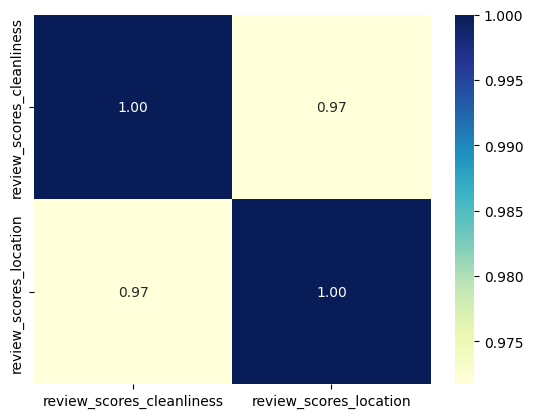

In [69]:
#Graficamos el mapa de los coeficientes de correlación 
Heat_Map= sns.heatmap(Corr_Factors1, cmap = 'YlGnBu', annot=True, fmt=".2f")  
Heat_Map

<Axes: xlabel='review_scores_cleanliness', ylabel='review_scores_location'>

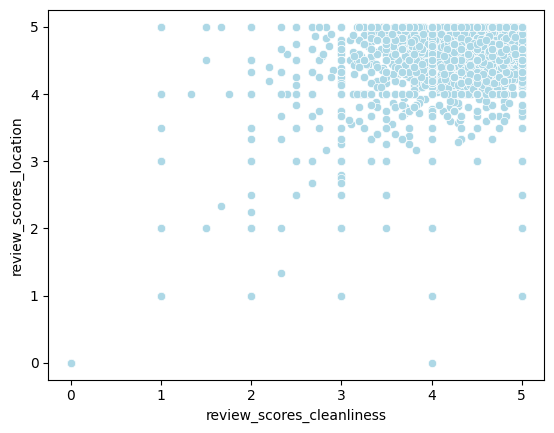

In [70]:
from turtle import color
sns.scatterplot(x=x.columns[0], y=y.columns[0], color="lightblue", data=data)

In [71]:
Vars_Indep= x
Var_Dep= y

In [72]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()
type(model)

sklearn.linear_model._base.LinearRegression

In [73]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [74]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [75]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[0.9955828]]),
 'rank_': 1,
 'singular_': array([279.32759063]),
 'intercept_': array([0.15144605])}

####**Modelo matemático**
 Modelo matemático:y= 0.918502x + 0.38539555

---




In [76]:
y_pred= model.predict(X=x)
y_pred

array([[4.44240791],
       [4.95015514],
       [4.82072937],
       ...,
       [0.15144605],
       [0.15144605],
       [0.15144605]])

In [77]:
#Insertamos la columna de predicciones en el DataFrame
data['Predicciones']= y_pred
data[[x.columns[0],'Predicciones']]


<ipython-input-77-e2c1e9328338>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Predicciones']= y_pred


,review_scores_cleanliness,Predicciones
2,4.31,4.442408
4,4.82,4.950155
5,4.69,4.820729
6,4.79,4.920288
7,4.78,4.910332
...,...,...
19650,0.00,0.151446
19651,0.00,0.151446
19652,0.00,0.151446
19653,0.00,0.151446


<Axes: xlabel='review_scores_cleanliness', ylabel='review_scores_location'>

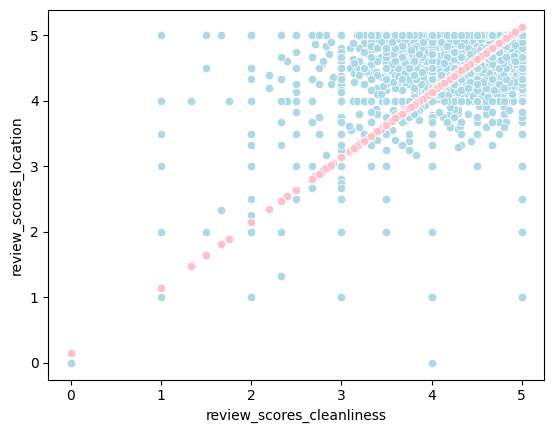

In [78]:
sns.scatterplot(x=x.columns[0], y=y.columns[0], color="lightblue", data=data)
sns.scatterplot(x=x.columns[0], y='Predicciones', color="pink", data=data)

In [79]:
varx_e.append(x.columns[0])
vary_e.append(y.columns[0])

In [80]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
deter_e.append(coef_Deter)
coef_Deter

0.9442438440398643

In [81]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
corr_e.append(coef_Correl)
coef_Correl

0.9717221022699156

###**availability_365 vs number_of_reviews**


In [82]:
x= entire[['number_of_reviews']]
y= entire[['availability_365']]
data=entire

In [83]:
#Encontramos la correlación entre las variables  
Corr_Factors=entire[[x.columns[0], y.columns[0]]].corr()
Corr_Factors

,number_of_reviews,availability_365
number_of_reviews,1.000000,0.031469
availability_365,0.031469,1.000000


In [84]:
#Encontramos el valor absoluto de todas las correlaciones entre las variables 
Corr_Factors1= abs(Corr_Factors)
Corr_Factors1

,number_of_reviews,availability_365
number_of_reviews,1.000000,0.031469
availability_365,0.031469,1.000000


<Axes: >

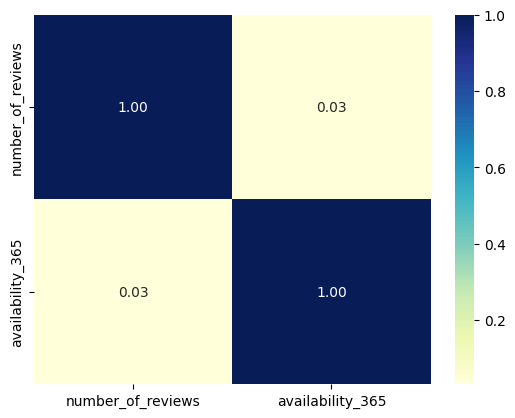

In [85]:
#Graficamos el mapa de los coeficientes de correlación 
Heat_Map= sns.heatmap(Corr_Factors1, cmap = 'YlGnBu', annot=True, fmt=".2f")  
Heat_Map

<Axes: xlabel='number_of_reviews', ylabel='availability_365'>

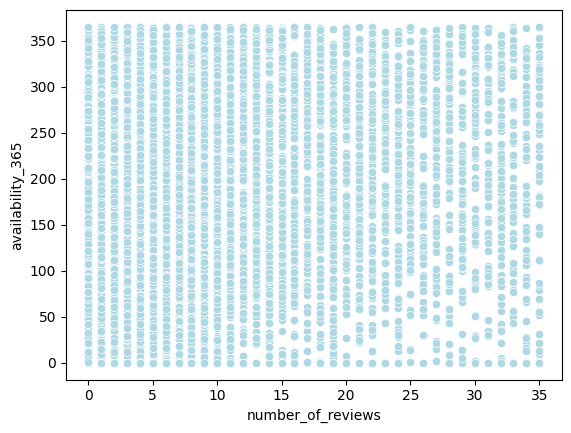

In [86]:
from turtle import color
sns.scatterplot(x=x.columns[0], y=y.columns[0], color="lightblue", data=data)

In [87]:
Vars_Indep= x
Var_Dep= y

In [88]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()
type(model)

sklearn.linear_model._base.LinearRegression

In [89]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [90]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [91]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[0.45130145]]),
 'rank_': 1,
 'singular_': array([1055.3764932]),
 'intercept_': array([188.04911054])}

####**Modelo matemático**
 Modelo matemático:y= 0.25499994x + 246.03421549

---




In [92]:
y_pred= model.predict(X=x)
y_pred

array([[188.04911054],
       [193.01342653],
       [201.13685269],
       ...,
       [188.04911054],
       [188.04911054],
       [188.04911054]])

In [93]:
#Insertamos la columna de predicciones en el DataFrame
data['Predicciones']= y_pred
data[[x.columns[0],'Predicciones']]


<ipython-input-93-e2c1e9328338>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Predicciones']= y_pred


,number_of_reviews,Predicciones
2,0.0,188.049111
4,11.0,193.013427
5,29.0,201.136853
6,15.0,194.818632
7,10.0,192.562125
...,...,...
19650,0.0,188.049111
19651,0.0,188.049111
19652,0.0,188.049111
19653,0.0,188.049111


<Axes: xlabel='number_of_reviews', ylabel='availability_365'>

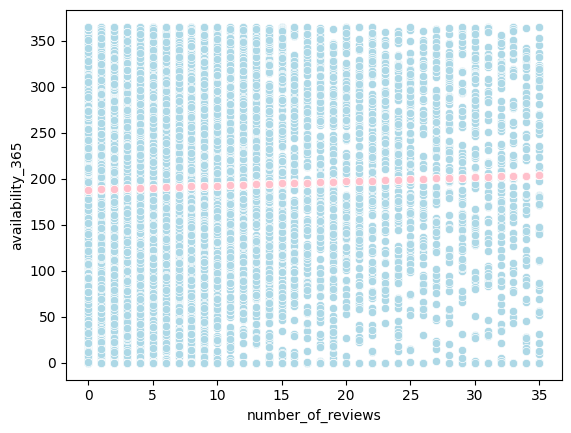

In [94]:
sns.scatterplot(x=x.columns[0], y=y.columns[0], color="lightblue", data=data)
sns.scatterplot(x=x.columns[0], y='Predicciones', color="pink", data=data)

In [95]:
varx_e.append(x.columns[0])
vary_e.append(y.columns[0])

In [96]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
deter_e.append(coef_Deter)
coef_Deter

0.0009902820227001286

In [97]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
corr_e.append(coef_Correl)
coef_Correl

0.03146874676087576

###**reviews_per_month vs review_scores_communication**


In [98]:
x= entire[['review_scores_communication']]
y= entire[['reviews_per_month']]
data=entire

In [99]:
#Encontramos la correlación entre las variables  
Corr_Factors=entire[[x.columns[0], y.columns[0]]].corr()
Corr_Factors

,review_scores_communication,reviews_per_month
review_scores_communication,1.000000,0.478117
reviews_per_month,0.478117,1.000000


In [100]:
#Encontramos el valor absoluto de todas las correlaciones entre las variables 
Corr_Factors1= abs(Corr_Factors)
Corr_Factors1

,review_scores_communication,reviews_per_month
review_scores_communication,1.000000,0.478117
reviews_per_month,0.478117,1.000000


<Axes: >

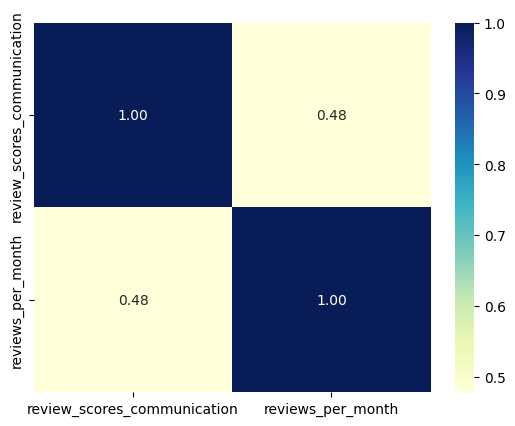

In [101]:
#Graficamos el mapa de los coeficientes de correlación 
Heat_Map= sns.heatmap(Corr_Factors1, cmap = 'YlGnBu', annot=True, fmt=".2f")  
Heat_Map

<Axes: xlabel='review_scores_communication', ylabel='reviews_per_month'>

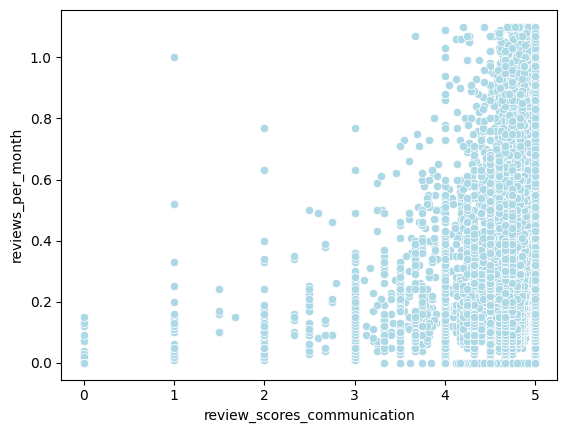

In [102]:
from turtle import color
sns.scatterplot(x=x.columns[0], y=y.columns[0], color="lightblue", data=data)

In [103]:
Vars_Indep= x
Var_Dep= y

In [104]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()
type(model)

sklearn.linear_model._base.LinearRegression

In [105]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [106]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [107]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_communication'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[0.0581563]]),
 'rank_': 1,
 'singular_': array([287.44759107]),
 'intercept_': array([0.00103564])}

####**Modelo matemático**
 Modelo matemático:y= 0.28910344x + 0.16789008

---




In [108]:
y_pred= model.predict(X=x)
y_pred

array([[0.27785964],
       [0.27611495],
       [0.25983119],
       ...,
       [0.00103564],
       [0.00103564],
       [0.00103564]])

In [109]:
#Insertamos la columna de predicciones en el DataFrame
data['Predicciones']= y_pred
data[[x.columns[0],'Predicciones']]


<ipython-input-109-e2c1e9328338>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Predicciones']= y_pred


,review_scores_communication,Predicciones
2,4.76,0.277860
4,4.73,0.276115
5,4.45,0.259831
6,4.50,0.262739
7,5.00,0.291817
...,...,...
19650,0.00,0.001036
19651,0.00,0.001036
19652,0.00,0.001036
19653,0.00,0.001036


<Axes: xlabel='review_scores_communication', ylabel='reviews_per_month'>

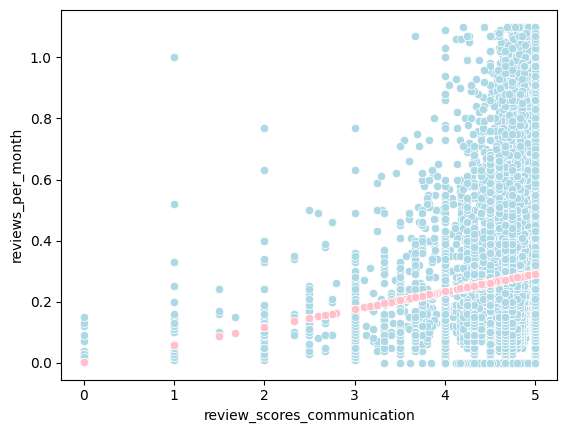

In [110]:
sns.scatterplot(x=x.columns[0], y=y.columns[0], color="lightblue", data=data)
sns.scatterplot(x=x.columns[0], y='Predicciones', color="pink", data=data)

In [111]:
varx_e.append(x.columns[0])
vary_e.append(y.columns[0])

In [112]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
deter_e.append(coef_Deter)
coef_Deter

0.22859546270852993

In [113]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
corr_e.append(coef_Correl)
coef_Correl

0.47811657857527795

##**Private room**

In [114]:
private=df[df['property_type']=='Private room']

###**host_acceptance_rate vs host_response_rate**

In [115]:
data=private

In [116]:
data.host_acceptance_rate= data.host_acceptance_rate.replace({'\%':''}, regex = True)
data.host_acceptance_rate= data.host_acceptance_rate.replace({'\,':''}, regex = True)
data.host_acceptance_rate= data.host_acceptance_rate.replace({'--':'0'}, regex = True)
data['host_acceptance_rate'] = data['host_acceptance_rate'].astype(float)

data.host_response_rate= data.host_response_rate.replace({'\%':''}, regex = True)
data.host_response_rate= data.host_response_rate.replace({'\,':''}, regex = True)
data.host_response_rate= data.host_response_rate.replace({'--':'0'}, regex = True)
data['host_response_rate'] = data['host_response_rate'].astype(float)

<ipython-input-116-0ef7a7995669>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.host_acceptance_rate= data.host_acceptance_rate.replace({'\%':''}, regex = True)
<ipython-input-116-0ef7a7995669>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.host_acceptance_rate= data.host_acceptance_rate.replace({'\,':''}, regex = True)
<ipython-input-116-0ef7a7995669>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

In [117]:
x= data[['host_response_rate']]
y= data[['host_acceptance_rate']]

In [118]:
#Encontramos la correlación entre las variables  
Corr_Factors=entire[[x.columns[0], y.columns[0]]].corr()
Corr_Factors

,host_response_rate,host_acceptance_rate
host_response_rate,1.000000,0.544535
host_acceptance_rate,0.544535,1.000000


In [119]:
#Encontramos el valor absoluto de todas las correlaciones entre las variables 
Corr_Factors1= abs(Corr_Factors)
Corr_Factors1

,host_response_rate,host_acceptance_rate
host_response_rate,1.000000,0.544535
host_acceptance_rate,0.544535,1.000000


<Axes: >

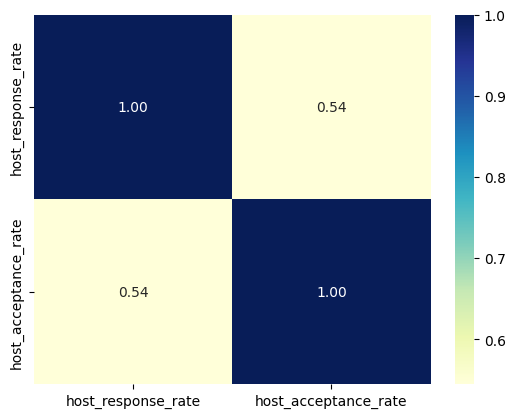

In [120]:
#Graficamos el mapa de los coeficientes de correlación 
Heat_Map= sns.heatmap(Corr_Factors1, cmap = 'YlGnBu', annot=True, fmt=".2f")  
Heat_Map

<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

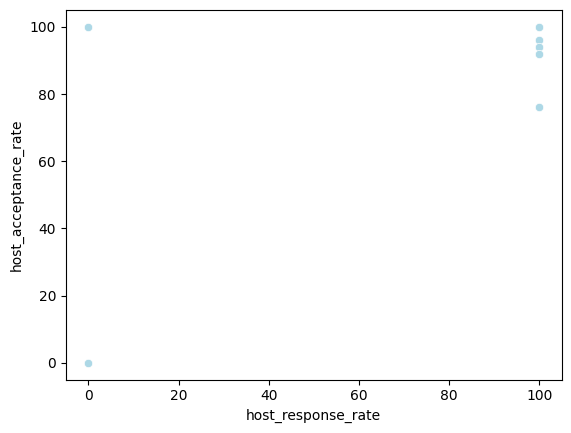

In [121]:
from turtle import color
sns.scatterplot(x=x.columns[0], y=y.columns[0], color="lightblue", data=data)

In [122]:
Vars_Indep= x
Var_Dep= y

In [123]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()
type(model)

sklearn.linear_model._base.LinearRegression

In [124]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [125]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [126]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_response_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[0.416]]),
 'rank_': 1,
 'singular_': array([119.52286093]),
 'intercept_': array([50.])}

####**Modelo matemático**
 Modelo matemático:y= 0.08441061x + 85.15840799

---




In [127]:
y_pred= model.predict(X=x)
y_pred

array([[91.6],
       [50. ],
       [91.6],
       [91.6],
       [50. ],
       [91.6],
       [91.6]])

In [128]:
#Insertamos la columna de predicciones en el DataFrame
data.insert(0, 'Predicciones', y_pred)
data[[x.columns[0],'Predicciones']]


,host_response_rate,Predicciones
356,100.0,91.6
2484,0.0,50.0
3134,100.0,91.6
7838,100.0,91.6
16665,0.0,50.0
17057,100.0,91.6
19022,100.0,91.6


<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

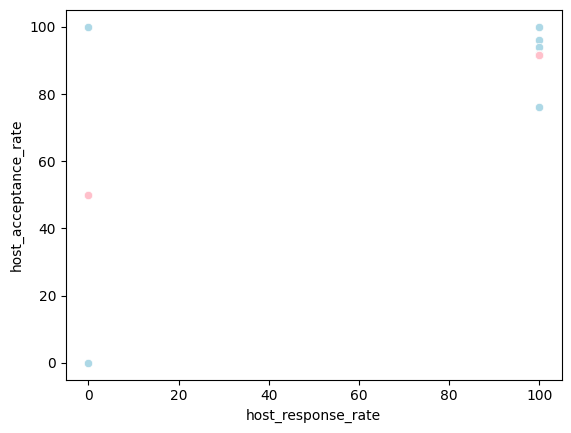

In [129]:
sns.scatterplot(x=x.columns[0], y=y.columns[0], color="lightblue", data=data)
sns.scatterplot(x=x.columns[0], y='Predicciones', color="pink", data=data)

In [130]:
varx_e.append(x.columns[0])
vary_e.append(y.columns[0])

In [131]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
deter_e.append(coef_Deter)
coef_Deter

0.3164886613021214

In [132]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
corr_e.append(coef_Correl)
coef_Correl

0.562573249721422

###**host_acceptance_rate vs price**

In [133]:
data=private

In [134]:
data.host_acceptance_rate= data.host_acceptance_rate.replace({'\%':''}, regex = True)
data.host_acceptance_rate= data.host_acceptance_rate.replace({'\,':''}, regex = True)
data.host_acceptance_rate= data.host_acceptance_rate.replace({'--':'0'}, regex = True)
data['host_acceptance_rate'] = data['host_acceptance_rate'].astype(float)

data.price= data.price.replace({'\$':''}, regex = True)
data.price= data.price.replace({'\,':''}, regex = True)
data.price= data.price.replace({'--':'0'}, regex = True)
data['price'] = data['price'].astype(float)

<ipython-input-134-60fe33bd4ab8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.host_acceptance_rate= data.host_acceptance_rate.replace({'\%':''}, regex = True)
<ipython-input-134-60fe33bd4ab8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.host_acceptance_rate= data.host_acceptance_rate.replace({'\,':''}, regex = True)
<ipython-input-134-60fe33bd4ab8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

In [135]:
x= data[['price']]
y= data[['host_acceptance_rate']]

In [136]:
#Encontramos la correlación entre las variables  
Corr_Factors=entire[[x.columns[0], y.columns[0]]].corr()
Corr_Factors

,price,host_acceptance_rate
price,1.000000,-0.030962
host_acceptance_rate,-0.030962,1.000000


In [137]:
#Encontramos el valor absoluto de todas las correlaciones entre las variables 
Corr_Factors1= abs(Corr_Factors)
Corr_Factors1

,price,host_acceptance_rate
price,1.000000,0.030962
host_acceptance_rate,0.030962,1.000000


<Axes: >

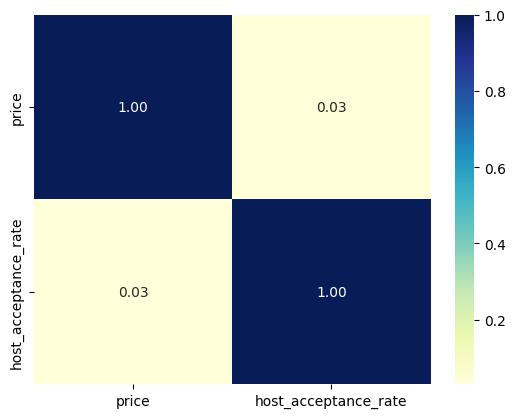

In [138]:
#Graficamos el mapa de los coeficientes de correlación 
Heat_Map= sns.heatmap(Corr_Factors1, cmap = 'YlGnBu', annot=True, fmt=".2f")  
Heat_Map

<Axes: xlabel='price', ylabel='host_acceptance_rate'>

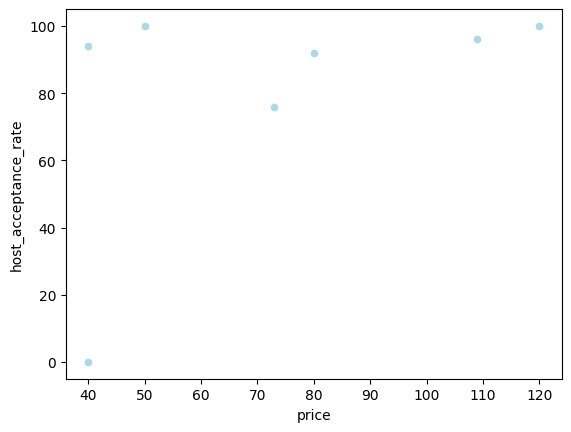

In [139]:
from turtle import color
sns.scatterplot(x=x.columns[0], y=y.columns[0], color="lightblue", data=data)

In [140]:
Vars_Indep= x
Var_Dep= y

In [141]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()
type(model)

sklearn.linear_model._base.LinearRegression

In [142]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [143]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [144]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['price'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[0.53000502]]),
 'rank_': 1,
 'singular_': array([79.12557831]),
 'intercept_': array([40.94820426])}

####**Modelo matemático**
 Modelo matemático:y= 5.14675674e-05x + 92.71990104

---




In [145]:
y_pred= model.predict(X=x)
y_pred

array([[ 98.71875143],
       [ 62.14840506],
       [ 79.63857071],
       [ 62.14840506],
       [ 67.44845525],
       [104.54880664],
       [ 83.34860585]])

In [146]:
#Insertamos la columna de predicciones en el DataFrame
data['Predicciones']= y_pred
data[[x.columns[0],'Predicciones']]


<ipython-input-146-e2c1e9328338>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Predicciones']= y_pred


,price,Predicciones
356,109.0,98.718751
2484,40.0,62.148405
3134,73.0,79.638571
7838,40.0,62.148405
16665,50.0,67.448455
17057,120.0,104.548807
19022,80.0,83.348606


<Axes: xlabel='price', ylabel='host_acceptance_rate'>

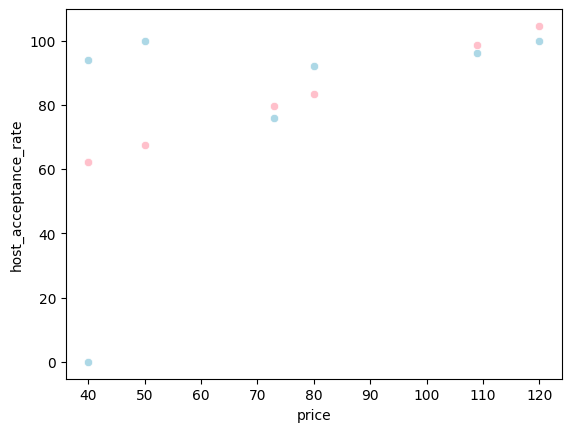

In [147]:
sns.scatterplot(x=x.columns[0], y=y.columns[0], color="lightblue", data=data)
sns.scatterplot(x=x.columns[0], y='Predicciones', color="pink", data=data)

In [148]:
varx_e.append(x.columns[0])
vary_e.append(y.columns[0])

In [149]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
deter_e.append(coef_Deter)
coef_Deter

0.22514551209042366

In [150]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
corr_e.append(coef_Correl)
coef_Correl

0.47449500744520345

###**host_acceptance_rate vs number_of_reviews**

In [151]:
data=private

In [152]:
x= data[['number_of_reviews']]
y= data[['host_acceptance_rate']]

In [153]:
#Encontramos la correlación entre las variables  
Corr_Factors=entire[[x.columns[0], y.columns[0]]].corr()
Corr_Factors

,number_of_reviews,host_acceptance_rate
number_of_reviews,1.000000,0.064665
host_acceptance_rate,0.064665,1.000000


In [154]:
#Encontramos el valor absoluto de todas las correlaciones entre las variables 
Corr_Factors1= abs(Corr_Factors)
Corr_Factors1

,number_of_reviews,host_acceptance_rate
number_of_reviews,1.000000,0.064665
host_acceptance_rate,0.064665,1.000000


<Axes: >

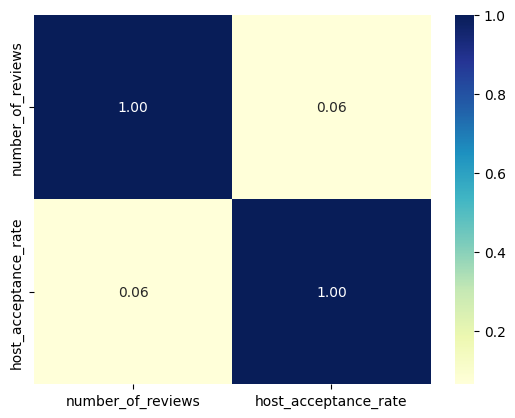

In [155]:
#Graficamos el mapa de los coeficientes de correlación 
Heat_Map= sns.heatmap(Corr_Factors1, cmap = 'YlGnBu', annot=True, fmt=".2f")  
Heat_Map

<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

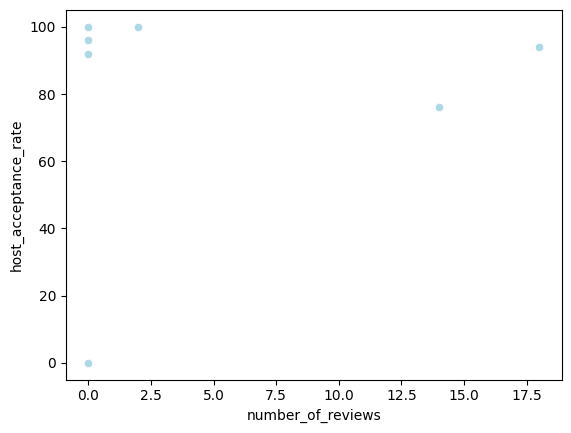

In [156]:
from turtle import color
sns.scatterplot(x=x.columns[0], y=y.columns[0], color="lightblue", data=data)

In [157]:
Vars_Indep= x
Var_Dep= y

In [158]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()
type(model)

sklearn.linear_model._base.LinearRegression

In [159]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [160]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [161]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[0.68471338]]),
 'rank_': 1,
 'singular_': array([18.94352509]),
 'intercept_': array([76.38853503])}

####**Modelo matemático**
 Modelo matemático:y= 0.11695192x + 90.8106745

---




In [162]:
y_pred= model.predict(X=x)
y_pred

array([[76.38853503],
       [76.38853503],
       [85.97452229],
       [88.7133758 ],
       [77.75796178],
       [76.38853503],
       [76.38853503]])

In [163]:
#Insertamos la columna de predicciones en el DataFrame
data['Predicciones']= y_pred
data[[x.columns[0],'Predicciones']]


<ipython-input-163-e2c1e9328338>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Predicciones']= y_pred


,number_of_reviews,Predicciones
356,0.0,76.388535
2484,0.0,76.388535
3134,14.0,85.974522
7838,18.0,88.713376
16665,2.0,77.757962
17057,0.0,76.388535
19022,0.0,76.388535


<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

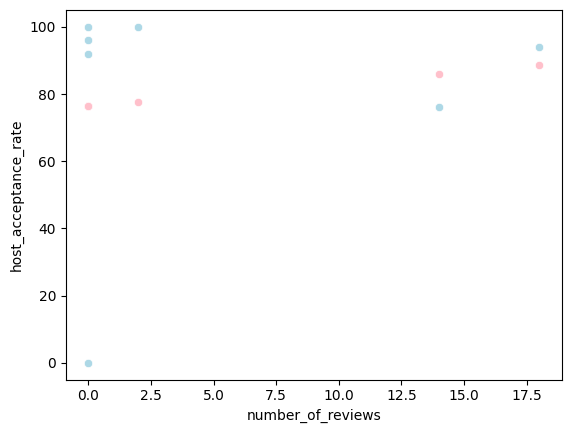

In [164]:
sns.scatterplot(x=x.columns[0], y=y.columns[0], color="lightblue", data=data)
sns.scatterplot(x=x.columns[0], y='Predicciones', color="pink", data=data)

In [165]:
varx_e.append(x.columns[0])
vary_e.append(y.columns[0])

In [166]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
deter_e.append(coef_Deter)
coef_Deter

0.021538167636602434

In [167]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
corr_e.append(coef_Correl)
coef_Correl

0.14675887583584998

###**review_scores_location vs review_scores_cleanliness**


In [168]:
data=private
x= data[['review_scores_cleanliness']]
y= data[['review_scores_location']]

In [169]:
#Encontramos la correlación entre las variables  
Corr_Factors=entire[[x.columns[0], y.columns[0]]].corr()
Corr_Factors

,review_scores_cleanliness,review_scores_location
review_scores_cleanliness,1.000000,0.971722
review_scores_location,0.971722,1.000000


In [170]:
#Encontramos el valor absoluto de todas las correlaciones entre las variables 
Corr_Factors1= abs(Corr_Factors)
Corr_Factors1

,review_scores_cleanliness,review_scores_location
review_scores_cleanliness,1.000000,0.971722
review_scores_location,0.971722,1.000000


<Axes: >

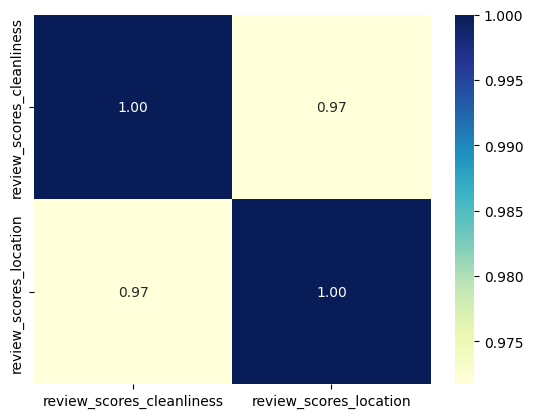

In [171]:
#Graficamos el mapa de los coeficientes de correlación 
Heat_Map= sns.heatmap(Corr_Factors1, cmap = 'YlGnBu', annot=True, fmt=".2f")  
Heat_Map

<Axes: xlabel='review_scores_cleanliness', ylabel='review_scores_location'>

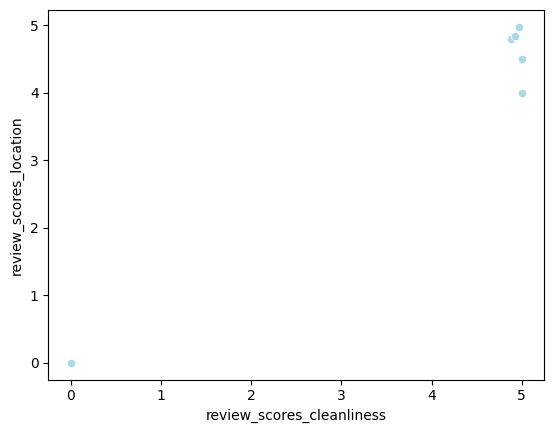

In [172]:
from turtle import color
sns.scatterplot(x=x.columns[0], y=y.columns[0], color="lightblue", data=data)

In [173]:
Vars_Indep= x
Var_Dep= y

In [174]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()
type(model)

sklearn.linear_model._base.LinearRegression

In [175]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [176]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [177]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[0.93208567]]),
 'rank_': 1,
 'singular_': array([5.92210146]),
 'intercept_': array([0.00603399])}

####**Modelo matemático**
 Modelo matemático:y= 0.97249811 + 0.06239836

---




In [178]:
y_pred= model.predict(X=x)
y_pred

array([[4.63849977],
       [4.55461206],
       [4.59189549],
       [4.66646234],
       [4.66646234],
       [0.00603399],
       [0.00603399]])

In [179]:
#Insertamos la columna de predicciones en el DataFrame
data['Predicciones']= y_pred
data[[x.columns[0],'Predicciones']]


<ipython-input-179-e2c1e9328338>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Predicciones']= y_pred


,review_scores_cleanliness,Predicciones
356,4.97,4.638500
2484,4.88,4.554612
3134,4.92,4.591895
7838,5.00,4.666462
16665,5.00,4.666462
17057,0.00,0.006034
19022,0.00,0.006034


<Axes: xlabel='review_scores_cleanliness', ylabel='review_scores_location'>

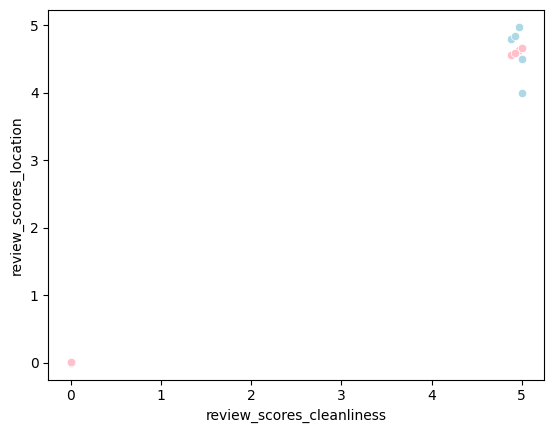

In [180]:
sns.scatterplot(x=x.columns[0], y=y.columns[0], color="lightblue", data=data)
sns.scatterplot(x=x.columns[0], y='Predicciones', color="pink", data=data)

In [181]:
varx_e.append(x.columns[0])
vary_e.append(y.columns[0])

In [182]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
deter_e.append(coef_Deter)
coef_Deter

0.9770589895334447

In [183]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
corr_e.append(coef_Correl)
coef_Correl

0.9884629429237318

###**availability_365 vs number_of_reviews**


In [184]:
data=private
x= data[['number_of_reviews']]
y= data[['availability_365']]

In [185]:
#Encontramos la correlación entre las variables  
Corr_Factors=entire[[x.columns[0], y.columns[0]]].corr()
Corr_Factors

,number_of_reviews,availability_365
number_of_reviews,1.000000,0.031469
availability_365,0.031469,1.000000


In [186]:
#Encontramos el valor absoluto de todas las correlaciones entre las variables 
Corr_Factors1= abs(Corr_Factors)
Corr_Factors1

,number_of_reviews,availability_365
number_of_reviews,1.000000,0.031469
availability_365,0.031469,1.000000


<Axes: >

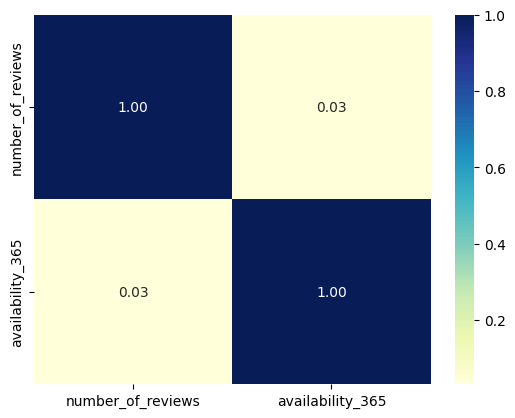

In [187]:
#Graficamos el mapa de los coeficientes de correlación 
Heat_Map= sns.heatmap(Corr_Factors1, cmap = 'YlGnBu', annot=True, fmt=".2f")  
Heat_Map

<Axes: xlabel='number_of_reviews', ylabel='availability_365'>

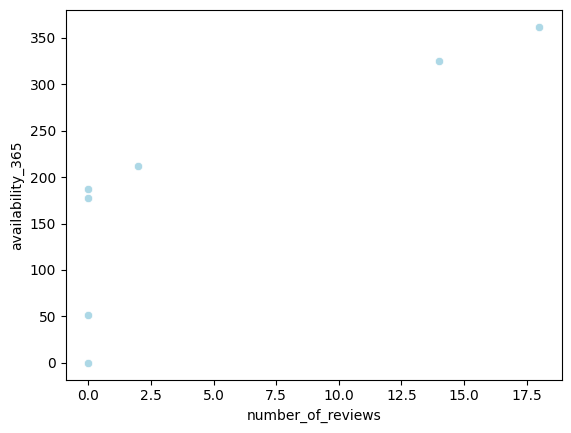

In [188]:
from turtle import color
sns.scatterplot(x=x.columns[0], y=y.columns[0], color="lightblue", data=data)

In [189]:
Vars_Indep= x
Var_Dep= y

In [190]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()
type(model)

sklearn.linear_model._base.LinearRegression

In [191]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [192]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [193]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[14.21974522]]),
 'rank_': 1,
 'singular_': array([18.94352509]),
 'intercept_': array([118.78980892])}

####**Modelo matemático**
 Modelo matemático:y= 1.51833024 + 254.70568407

---




In [194]:
y_pred= model.predict(X=x)
y_pred

array([[118.78980892],
       [118.78980892],
       [317.86624204],
       [374.74522293],
       [147.22929936],
       [118.78980892],
       [118.78980892]])

In [195]:
#Insertamos la columna de predicciones en el DataFrame
data['Predicciones']= y_pred
data[[x.columns[0],'Predicciones']]


<ipython-input-195-e2c1e9328338>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Predicciones']= y_pred


,number_of_reviews,Predicciones
356,0.0,118.789809
2484,0.0,118.789809
3134,14.0,317.866242
7838,18.0,374.745223
16665,2.0,147.229299
17057,0.0,118.789809
19022,0.0,118.789809


<Axes: xlabel='number_of_reviews', ylabel='availability_365'>

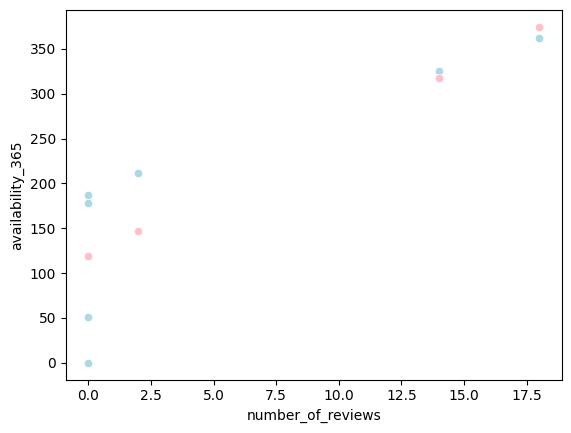

In [196]:
sns.scatterplot(x=x.columns[0], y=y.columns[0], color="lightblue", data=data)
sns.scatterplot(x=x.columns[0], y='Predicciones', color="pink", data=data)

In [197]:
varx_e.append(x.columns[0])
vary_e.append(y.columns[0])

In [198]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
deter_e.append(coef_Deter)
coef_Deter

0.698814737912203

In [199]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
corr_e.append(coef_Correl)
coef_Correl

0.8359513968600106

###**reviews_per_month vs review_scores_communication**


In [200]:
data=private
x= data[['review_scores_communication']]
y= data[['reviews_per_month']]

In [201]:
#Encontramos la correlación entre las variables  
Corr_Factors=entire[[x.columns[0], y.columns[0]]].corr()
Corr_Factors

,review_scores_communication,reviews_per_month
review_scores_communication,1.000000,0.478117
reviews_per_month,0.478117,1.000000


In [202]:
#Encontramos el valor absoluto de todas las correlaciones entre las variables 
Corr_Factors1= abs(Corr_Factors)
Corr_Factors1

,review_scores_communication,reviews_per_month
review_scores_communication,1.000000,0.478117
reviews_per_month,0.478117,1.000000


<Axes: >

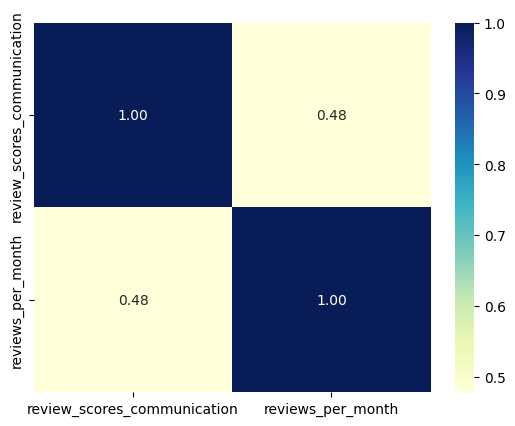

In [203]:
#Graficamos el mapa de los coeficientes de correlación 
Heat_Map= sns.heatmap(Corr_Factors1, cmap = 'YlGnBu', annot=True, fmt=".2f")  
Heat_Map

<Axes: xlabel='review_scores_communication', ylabel='reviews_per_month'>

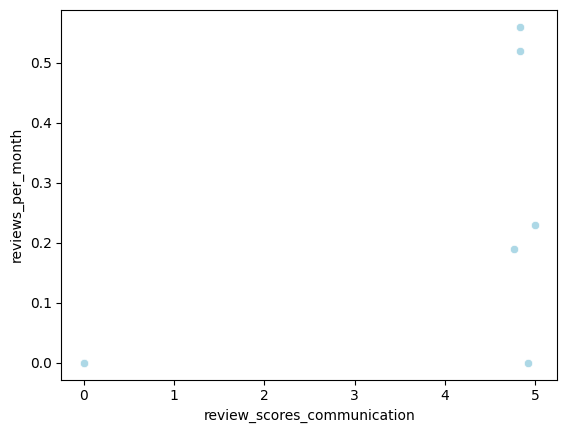

In [204]:
from turtle import color
sns.scatterplot(x=x.columns[0], y=y.columns[0], color="lightblue", data=data)

In [205]:
Vars_Indep= x
Var_Dep= y

In [206]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()
type(model)

sklearn.linear_model._base.LinearRegression

In [207]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [208]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [209]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_communication'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[0.06059002]]),
 'rank_': 1,
 'singular_': array([5.82356297]),
 'intercept_': array([0.00351902])}

####**Modelo matemático**
 Modelo matemático:y= 0.2740233x + 0.1625107

---




In [210]:
y_pred= model.predict(X=x)
y_pred

array([[0.30162189],
       [0.29616879],
       [0.29253339],
       [0.29616879],
       [0.30646909],
       [0.00351902],
       [0.00351902]])

In [211]:
#Insertamos la columna de predicciones en el DataFrame
data['Predicciones']= y_pred
data[[x.columns[0],'Predicciones']]


<ipython-input-211-e2c1e9328338>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Predicciones']= y_pred


,review_scores_communication,Predicciones
356,4.92,0.301622
2484,4.83,0.296169
3134,4.77,0.292533
7838,4.83,0.296169
16665,5.00,0.306469
17057,0.00,0.003519
19022,0.00,0.003519


<Axes: xlabel='review_scores_communication', ylabel='reviews_per_month'>

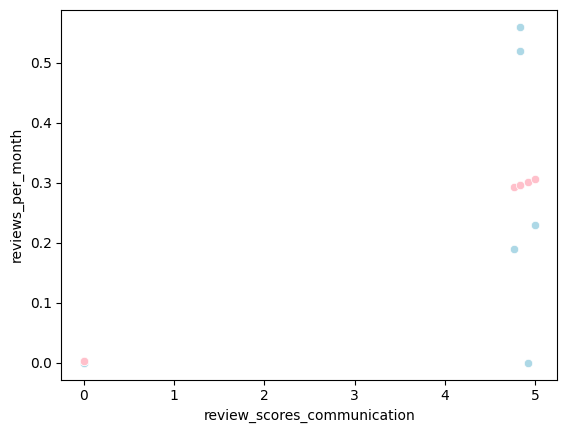

In [212]:
sns.scatterplot(x=x.columns[0], y=y.columns[0], color="lightblue", data=data)
sns.scatterplot(x=x.columns[0], y='Predicciones', color="pink", data=data)

In [213]:
varx_e.append(x.columns[0])
vary_e.append(y.columns[0])

In [214]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
deter_e.append(coef_Deter)
coef_Deter

0.3541327599653541

In [215]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
corr_e.append(coef_Correl)
coef_Correl

0.5950905477029139

##**Tabla de coeficientes**

In [216]:
tabla=pd.DataFrame()

In [217]:
tipo=['Entire home/apt','Entire home/apt','Entire home/apt','Entire home/apt','Entire home/apt','Entire home/apt','Private Room','Private Room','Private Room','Private Room','Private Room','Private Room']

In [218]:
tabla['Tipo Habitación'] = tipo
tabla['Variable X'] = varx_e
tabla['Variable Y'] = vary_e  
tabla['Coef Determinación'] = deter_e
tabla['Coef Correlación'] = corr_e

In [219]:
tabla

,Tipo Habitación,Variable X,Variable Y,Coef Determinación,Coef Correlación
0,Entire home/apt,host_response_rate,host_acceptance_rate,0.296518,0.544535
1,Entire home/apt,price,host_acceptance_rate,0.000959,0.030962
2,Entire home/apt,number_of_reviews,host_acceptance_rate,0.004182,0.064665
3,Entire home/apt,review_scores_cleanliness,review_scores_location,0.944244,0.971722
4,Entire home/apt,number_of_reviews,availability_365,0.000990,0.031469
5,Entire home/apt,review_scores_communication,reviews_per_month,0.228595,0.478117
6,Private Room,host_response_rate,host_acceptance_rate,0.316489,0.562573
7,Private Room,price,host_acceptance_rate,0.225146,0.474495
8,Private Room,number_of_reviews,host_acceptance_rate,0.021538,0.146759
9,Private Room,review_scores_cleanliness,review_scores_location,0.977059,0.988463
